In [16]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms

from PIL import Image
import matplotlib.pyplot as plt
import json

In [3]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

d:\Anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
d:\Anaconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\DELL/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
from typing import Any


class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    
    def __call__(self, img):
        return self.base_transform(img)


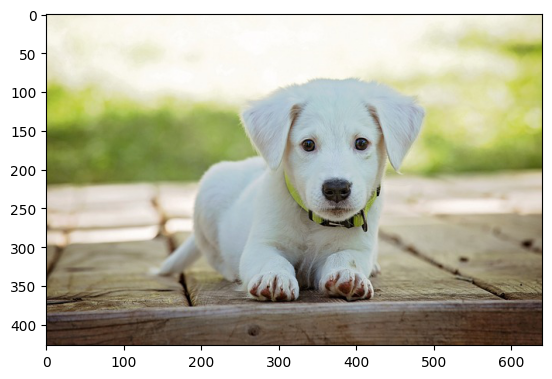

In [11]:
image_file_path = "data\dog.jpg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

In [13]:
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std)
img_transform = transform(img)

# (chanels, height, width) -> (height, width, chanels) to show in PIL
# clip (0, 1)

img_transformed = img_transform.numpy().transpose(1, 2, 0)
img_transformed = np.clip(img_transformed, 0, 1)


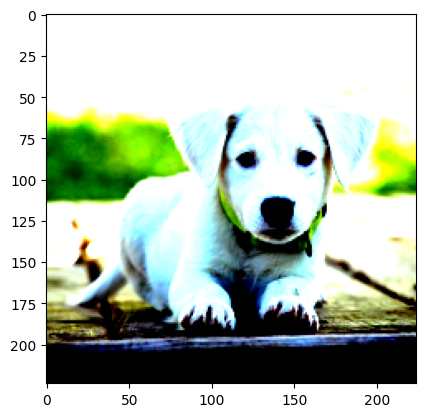

In [14]:
plt.imshow(img_transformed)

In [15]:
class Predictor():
    def __init__(self, class_index):
        self.class_index = class_index
    
    def predict_max(self, out):
        max_id = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(max_id)]

        return predicted_label_name

In [18]:
class_index = json.load(open("imagenet_class_index.json", "r"))

In [19]:
predictor = Predictor(class_index)

In [21]:

image_file_path = "data\dog.jpg"
img = Image.open(image_file_path)

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
img_transformed = img_transformed.unsqueeze_(0)
print(img_transformed.shape)

torch.Size([1, 3, 224, 224])


In [23]:
out = net(img_transformed)
result = predictor.predict_max(out)
print("Result is {}".format(result[1]))

Result is Labrador_retriever


#### **Các bước xây dựng project AI**
1. Tiền xử lý, hậu xử lý, in/out của mạng
2. Tạo Dataset
3. Tạo Dataloader
4. Xây dựng Network
5. Định nghĩa forward() trong network
6. Định nghĩa hàm loss
7. Thiếp lập thuật toán tối ưu
8. Thực hiện việc học và kiểm thử network
9. Dự đoán với Data test